# Aqui hay un conjunto de librerias cada una cumple la funcion de resolver una de las tareas asignadas 


  - import E_S_T as a
  
## •	Serie de tiempo de la coordenada de centroide del Municipio de Santa Rosa de Osos

  --- extraccion_1: esta lo que hace es que genera la extraccion de una serie de tiempo dentro de un archivo netCDF
  este solo necesita la ubicacion del directorio, la raiz del directorio, la latitud y longitud del punto a analizar.
  
  Cabe resaltar que ya existen valores por defecto, se recomiendo no cambiar los del "directorio" y "directorio_raiz"

  extraccion_1(directorio= '../netCDF/*.nc', directorio_raiz = '../netCDF', latt =  6.646697 , lonn = -75.460673)

## •	Serie de tiempo del promedio espacial en el tiempo del departamento de Antioquia

  ---  multiple_extraccion: esta funcion lo que hace es que tu puedas extraer la precipitacion de distintas ubicaciones selecccionadas
  para eso es necesario contar con un CSV ya previamente definido con el lugar, latitud y longitud

  Cabe resaltar que esta tambien cuenta con valores por defectos, se recomienda solo cambiar "ubixaciones"

  multiple_extraccion(directorio= '../netCDF/*.nc', directorio_raiz = '../netCDF', ubixaciones = '../XLSM/UBICACIONES.csv')

  --- Combinacion_df: esta funcion lo que hace es combinar de forma automatica distintos CSVs presentes dentro de CSV_OUT, esto con el fin de sacar 
  la serie de tiempo con precipitacion promedio entre los distintos lugares seleccionados , basicmanete esta funcion y la anterior se usan en conjunto

  Cabe resaltar que esta tambien cuenta con valores por defectos.

  Combinacion_df(csv_directory = '../CSV_OUT/'):


## •	archivo recortado al dominio de simulación WRF usado
## •	archivo recortado al departamento de Antioquia

In [9]:
import E_S_T as a 


In [10]:
a.extraccion_1()

Se ejecuto de forma exitosa


In [12]:
a.extraccion_1(latt=0.654 , lonn= 102)

Se ejecuto de forma exitosa


In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap # ** documentacion https://matplotlib.org/basemap/api/basemap_api.html
from netCDF4 import Dataset
import netCDF4 as nc
import numpy as np
import xarray as xr



In [2]:
import numpy as np
import xarray as xr

def extraccion_region(netcdf_file = '../netCDF/1990.nc',lat_min = 4, lat_max= 10, lon_min = 282 , lon_max = 287 , n = 3 ):
    
    # Reemplaza 'archivo.nc' con la ruta de tu archivo NetCDF
    dataset = xr.open_dataset(netcdf_file)

    # Recorta la región de interés
    subset = dataset.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))
    xr.Dataset.to_netcdf(subset , '../NC_OUT/extraccion.nc')

    # Crear una instancia de Basemap
    lons = subset.variables['lon'][:]
    lats = subset.variables['lat'][:]
    time = subset.variables['time'][:]
    preci = subset.variables['pr'][:]

    m = Basemap(projection='merc', llcrnrlat= lat_min , urcrnrlat=lat_max, llcrnrlon= lon_min, urcrnrlon=lon_max)
    # Crear una figura de Matplotlib
    fig = plt.figure(figsize=(12, 9))

    # Dibuja líneas de la costa y fronteras políticas
    m.drawcoastlines()
    m.drawcountries()
    m.drawstates()
    lon , lat = np.meshgrid(lons,lats)
    x,y = m(lon, lat)
    C_scale = m.pcolor(x,y,np.squeeze(preci[n, : , :]), cmap = 'jet' )
    c_bar = m.colorbar(C_scale , location= 'right', pad = '10%' )
    
  
    # Dibujar meridianos y paralelos
    m.drawmeridians(range(lon_min , lon_max , 5), labels=[0, 0, 0, 1])
    m.drawparallels(range(lat_min, lat_max, 2), labels=[1, 0, 0, 0])


    # Mostrar el mapa
    plt.title("Mapa Base con Basemap")
    plt.show()

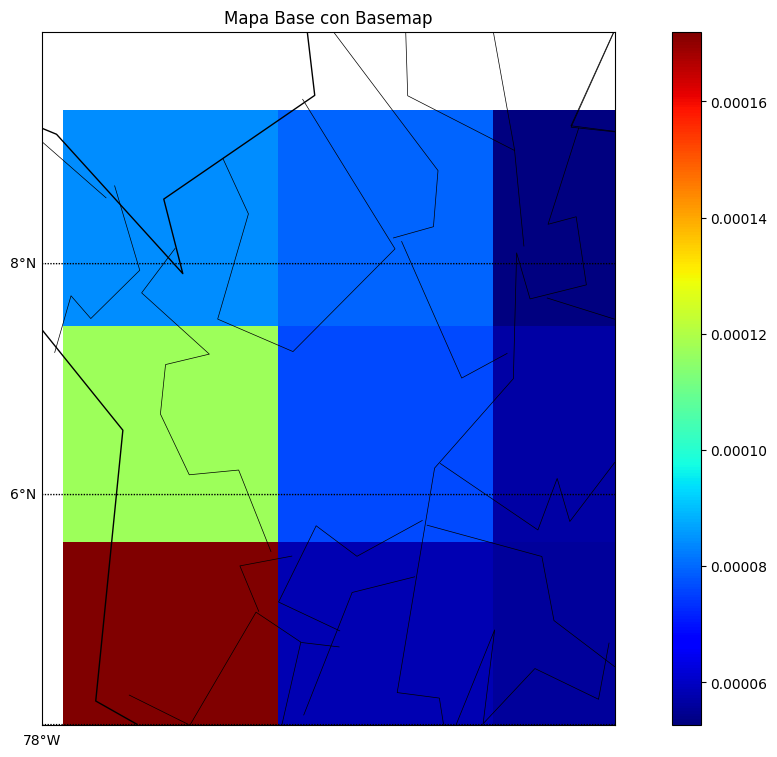

In [3]:
extraccion_region()